## Imports

In [1]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np
import os
import shutil
import gdown
import zipfile
from google.colab.patches import cv2_imshow
from abc import ABCMeta, abstractmethod
import math
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import cityblock
import pandas as pd

## Load Data

In [2]:
folder = "ICE 07 Pictuers/"
if not os.path.isdir(folder):
    gdown.download_folder("https://drive.google.com/drive/folders/1jCrjShTArAQZAT8qxR25-nu2kXkL9aL3?usp=sharing", quiet=False, use_cookies=False)
    shutil.move("/content/%sICE-7_data.zip"%(folder), "ICE-7_data.zip")
    shutil.move("/content/%s1.jpg"%folder, "1.jpg")
    with zipfile.ZipFile("ICE-7_data.zip", "r") as file:
        file.extractall("")
folder = "ICE-7_data/"

Retrieving folder list


Processing file 1RlP3EfgYVXBq3wvWXyRv9tMr1AtR7NoU 1.jpg
Processing file 1kddXMTMu_3JTlZRmwUcaoMuXP84LJnUu ICE-7_data.zip
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1RlP3EfgYVXBq3wvWXyRv9tMr1AtR7NoU
To: /content/ICE 07 Pictuers/1.jpg
100%|██████████| 40.2k/40.2k [00:00<00:00, 14.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kddXMTMu_3JTlZRmwUcaoMuXP84LJnUu
To: /content/ICE 07 Pictuers/ICE-7_data.zip
100%|██████████| 1.60M/1.60M [00:00<00:00, 58.0MB/s]
Download completed


## ICE-7. MPEG-7 Color Layout Descriptor
Please download the images from the following link:<br>
https://drive.google.com/file/d/1h0JFzpyc7zNZiln5Ls74CfvOfhtl51XK/view?usp=sharing <br><br>
Please refer to the following link for the code of Color Layout Descriptor: <br>
https://github.com/scferrada/imgpedia

## Task 1. Please using the given code to extract the color layout features from the downloaded image 001.jpg, and display it.

### IMGpedai Code

In [3]:
class DescriptorComputer:
	__metaclass__ = ABCMeta
	
	@abstractmethod
	def compute(self, frame):
		pass

In [4]:
class ColorLayoutComputer(DescriptorComputer):
        
    def __init__(self):
        self.rows = 8
        self.cols = 8
        self.prefix = "CLD"
              
    def compute(self, img):
        averages = np.zeros((self.rows,self.cols,3))
        imgH, imgW, _ = img.shape
        for row in range(self.rows):
            for col in range(self.cols):
                a = int(imgH/self.rows * row)
                b = int(imgH/self.rows * (row+1))
                c = int(imgW/self.cols*col)
                d = int(imgW/self.cols*(col+1))

                slice = img[a:b, c:d]
                average_color_per_row = np.mean(slice, axis=0)
                average_color = np.mean(average_color_per_row, axis=0)
                average_color = np.uint8(average_color)
                averages[row][col][0] = average_color[0]
                averages[row][col][1] = average_color[1]
                averages[row][col][2] = average_color[2]
        icon = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)
        y, cr, cb = cv2.split(icon)
        dct_y = cv2.dct(np.float32(y))
        dct_cb = cv2.dct(np.float32(cb))
        dct_cr = cv2.dct(np.float32(cr))
        dct_y_zigzag = []
        dct_cb_zigzag = []
        dct_cr_zigzag = []
        flip = True
        flipped_dct_y = np.fliplr(dct_y)
        flipped_dct_cb = np.fliplr(dct_cb)
        flipped_dct_cr = np.fliplr(dct_cr)
        for i in range(self.rows + self.cols -1):
            k_diag = self.rows - 1 - i
            diag_y = np.diag(flipped_dct_y, k=k_diag)
            diag_cb = np.diag(flipped_dct_cb, k=k_diag)
            diag_cr = np.diag(flipped_dct_cr, k=k_diag)
            if flip:
                diag_y = diag_y[::-1]
                diag_cb = diag_cb[::-1]
                diag_cr = diag_cr[::-1]
            dct_y_zigzag.append(diag_y)
            dct_cb_zigzag.append(diag_cb)
            dct_cr_zigzag.append(diag_cr)
            flip = not flip
        return np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])

### Task Code

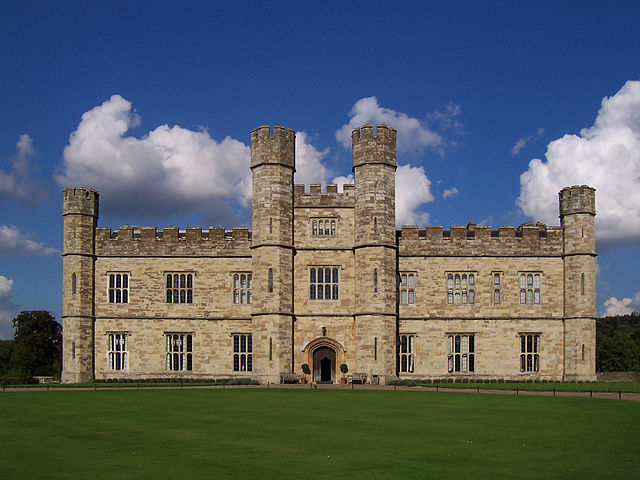

In [5]:
img_001 = "001.jpg"
img = cv2.imread(folder+img_001)
cv2_imshow(img)

In [6]:
computer = ColorLayoutComputer()
descriptor = computer.compute(img)
descriptor

array([ 7.54875000e+02, -3.71453323e+01, -2.75390893e-01, -2.05506821e+02,
        7.78468102e-02, -2.34176540e+01, -3.93178177e+01,  3.43435440e+01,
        2.75409832e+01, -5.34272051e+00, -4.38750000e+01,  5.65796041e+00,
        2.59727240e+00, -2.54444008e+01, -1.43750000e+01, -2.34878922e+01,
        2.55022869e+01,  2.20043163e+01, -3.80048065e+01, -5.47946072e+00,
        6.65629059e-02,  5.35990372e+01, -1.31532040e+01,  2.22179368e-01,
        4.08514328e+01, -2.71923709e+00, -2.33335533e+01, -7.21246767e+00,
       -2.86610723e+00,  1.22206163e+01,  3.80418777e+00, -3.12251759e+01,
        3.03049412e+01,  1.38942504e+00,  7.60543251e+00,  1.85286961e+01,
        1.82548904e+01, -2.60280678e-03, -1.26275692e+01,  2.58750000e+01,
        2.63148155e+01, -3.00260210e+00, -2.30272079e+00, -2.49541059e-01,
       -1.75480080e+01,  2.62883568e+01,  8.04879284e+00, -2.93222847e+01,
        1.81053467e+01, -1.63744450e+01, -1.93038082e+01,  1.69019365e+00,
        8.70240688e+00,  

In [7]:
len(descriptor)

192

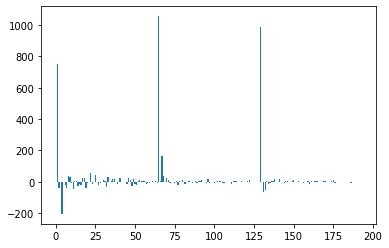

In [8]:
plt.bar([i+1 for i in range(len(descriptor))], descriptor.tolist())
plt.show()

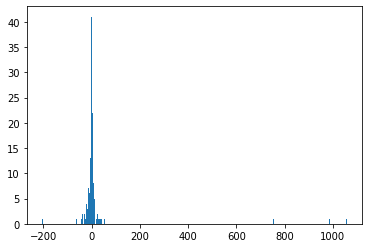

In [9]:
plt.hist(descriptor, 500)
plt.show()

## Task 2. Retrieve the image that is the most similar to image 001.jpg from the downloaded images (not itself).
Please try to use at least three different metrics to measure the distance between color layout descriptors (L1 distance, L2 distance, earth mover's distance, etc)

In [10]:
# Iterate
df = []
for (r, d, files) in os.walk(folder):
    for f in sorted(files):
        if f != img_001:
            img_new = cv2.imread(folder+f)
            d_new = computer.compute(img_new)

            # L2/Euclidian distance
            distance_e = np.linalg.norm(descriptor - d_new)

            # Cosine distance
            distance_c = cosine_distances([descriptor], [d_new])[0][0]

            # Manhattan
            distance_m = cityblock(descriptor, d_new)

            df.append([img_001, f, distance_e, distance_c, distance_m])

df = pd.DataFrame(df, columns=["Original Image", "New Image", "Euclidian Distance", "Cosine Distance", "Manhattan Distance"])
df

,Original Image,New Image,Euclidian Distance,Cosine Distance,Manhattan Distance
0,001.jpg,002.jpg,337.921600,0.018519,2374.996826
1,001.jpg,003.jpg,778.361755,0.100341,3898.565674
2,001.jpg,004.jpg,383.691284,0.026924,3270.576416
3,001.jpg,005.jpg,541.740723,0.053234,3543.373535
4,001.jpg,006.jpg,448.428375,0.036734,3105.935059
5,001.jpg,007.jpg,622.981567,0.070152,3915.110840
6,001.jpg,008.jpg,621.807861,0.071321,3565.516846
7,001.jpg,009.jpg,619.439270,0.066962,4331.290527
8,001.jpg,010.jpg,447.077179,0.035425,3119.416260
9,001.jpg,011.jpg,507.567719,0.046707,3608.269775


In [11]:
col = "Euclidian Distance"
e = df[["New Image", col]].sort_values(col)
e

,New Image,Euclidian Distance
0,002.jpg,337.921600
2,004.jpg,383.691284
8,010.jpg,447.077179
4,006.jpg,448.428375
9,011.jpg,507.567719
14,016.jpg,525.626282
3,005.jpg,541.740723
13,015.jpg,556.523132
7,009.jpg,619.439270
6,008.jpg,621.807861


In [12]:
col = "Cosine Distance"
c = df[["New Image", col]].sort_values(col)
c

,New Image,Cosine Distance
0,002.jpg,0.018519
2,004.jpg,0.026924
8,010.jpg,0.035425
4,006.jpg,0.036734
14,016.jpg,0.046249
9,011.jpg,0.046707
3,005.jpg,0.053234
13,015.jpg,0.053421
15,017.jpg,0.064684
7,009.jpg,0.066962


In [13]:
col = "Manhattan Distance"
m = df[["New Image", col]].sort_values(col)
m

,New Image,Manhattan Distance
0,002.jpg,2374.996826
4,006.jpg,3105.935059
8,010.jpg,3119.416260
2,004.jpg,3270.576416
13,015.jpg,3315.221436
15,017.jpg,3410.265381
14,016.jpg,3527.913818
3,005.jpg,3543.373535
6,008.jpg,3565.516846
9,011.jpg,3608.269775


In [14]:
col = "New Image"
e = e[col].tolist()
c = c[col].tolist()
m = m[col].tolist()

In [15]:
diffs = {"e-c": [], "e-m": [], "c-m": []}
for f in df[col].tolist():
    idx_e = e.index(f)
    idx_c = c.index(f)
    idx_m = m.index(f)
    diffs["e-c"].append(abs(idx_e - idx_c))
    diffs["e-m"].append(abs(idx_e - idx_m))
    diffs["c-m"].append(abs(idx_c - idx_m))
for k in diffs:
    diffs[k] = sum(diffs[k])
print(diffs)

{'e-c': 10, 'e-m': 40, 'c-m': 38}


In [16]:
df = []
for i in range(len(e)):
    df.append([e[i], c[i], m[i]])
df = pd.DataFrame(df, columns=["Euclidian", "Cosine", "Manhattan"])
df

,Euclidian,Cosine,Manhattan
0,002.jpg,002.jpg,002.jpg
1,004.jpg,004.jpg,006.jpg
2,010.jpg,010.jpg,010.jpg
3,006.jpg,006.jpg,004.jpg
4,011.jpg,016.jpg,015.jpg
5,016.jpg,011.jpg,017.jpg
6,005.jpg,005.jpg,016.jpg
7,015.jpg,015.jpg,005.jpg
8,009.jpg,017.jpg,008.jpg
9,008.jpg,009.jpg,011.jpg


## Question 1. Please answer if the outputs of Task 2 are the same. If the outputs are different, based on your perspective, which metrics gives the most similar retrieval? If the outputs are the same, do you think we can use any metrics to compare the color layout features in any cases? Give an explanation to your answer.

**Answer to Q1**: The outputs are not the same. Euclidian and cosine distances produce the most similar distance orders, and so the most similar retrievals. This can be seen numerically by looking at the differences between index ordering (shown below). The Euclidian-cosine differences has a significantly lower score than the other two pairings.


In [17]:
print(diffs)

{'e-c': 10, 'e-m': 40, 'c-m': 38}


---

## Image Filtering



## (Tutorial) Convolutional filter
Please review the following article for further understanding of Convolutional layer in Convolutional Neural Network
https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ <br>
Please download the image from the following link for the your program <br>
https://drive.google.com/file/d/1MSQ8e0nxoBIkcp5sdo8Vd-65b9okx6hX/view?usp=sharing

* use pip install opencv-python to install cv2

## Example. Convolutional filter

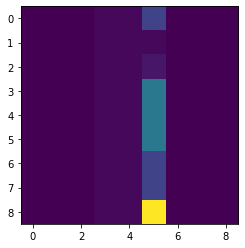

[[  0   0   0   5   0  77   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0 134   0   0   0]
 [  0   0   0   3   0 117   0   0   0]
 [  0   0   0   3   0 127   0   0   0]
 [  0   0   0   3   0  47   0   0   0]
 [  0   0   0   3   0  17   0   0   0]
 [  0   0   0   5   0 255   0   0   0]]


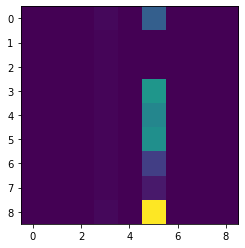

In [18]:
# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')   
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil = np.array([[ -1, -1, -1],                        
                [ -1, 8, -1],
                [ -1, -1, -1]])
#use filter2D to apply convolution
res = cv2.filter2D(data, -1, fil, borderType=cv2.BORDER_CONSTANT)   
print(res)

plt.imshow(res)
pylab.show()

## Task 3. Building three different kernels for different purposes, and commenting the purpose of each kernel
For instance, the kernel in the example is using for edge extraction

Original:
[[ 0  0  0  1  1 10  0  0  0]
 [ 0  0  0  1  1  1  0  0  0]
 [ 0  0  0  1  1  3  0  0  0]
 [ 0  0  0  1  1 20  0  0  0]
 [ 0  0  0  1  1 20  0  0  0]
 [ 0  0  0  1  1 20  0  0  0]
 [ 0  0  0  1  1 10  0  0  0]
 [ 0  0  0  1  1 10  0  0  0]
 [ 0  0  0  1  1 50  0  0  0]]


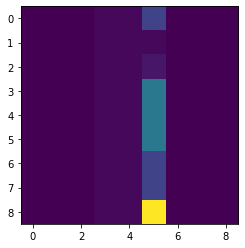


Horizontal Line Detection:


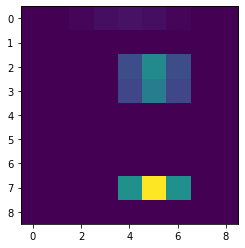


Horizontal Line Detection:


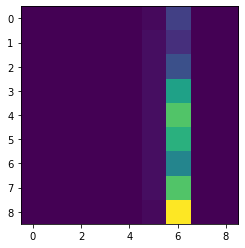


Blur Image:


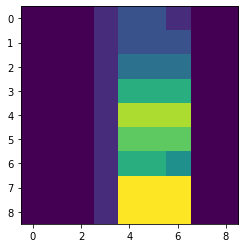

In [19]:
# Original
print("Original:")
print(data)
plt.imshow(data)
pylab.show()

# Horizontal line detection:
# Having the middle values (horizontally) be 0 while the bottom values are negative 
# and the bottom values positive allows the filter to pick up on differences in values 
# vertically, which is horizontal line detection. This specific filter is a horizontal
# sobel filter.
print("\nHorizontal Line Detection:")
fil_h = np.array([[ -1, -2, -1],                        
                  [ 0, 0, 0],
                  [ 1, 2, 1]])
res_h = cv2.filter2D(data, -1, fil_h, borderType=cv2.BORDER_CONSTANT)    
plt.imshow(res_h)
pylab.show()

# Vertical line detection:
# Having the middle values (vertically) be 0 while the right values are negative 
# and the left values positive allows the filter to pick up on differences in values 
# horizontally, which is vertical line detection. This specific filter is a vertical
# sobel filter.
print("\nHorizontal Line Detection:")
fil_v = np.array([[ 1, 0, -1],                        
                  [ 2, 0, -2],
                  [ 1, 0, -1]])
res_v = cv2.filter2D(data, -1, fil_v, borderType=cv2.BORDER_CONSTANT)    
plt.imshow(res_v)
pylab.show()

# Blur image:
# By having fractional, even values across the enitre filter, the values in the 
# original image are evened out, causing a simple blur effect.
print("\nBlur Image:")
fil_b = np.array([[ 1/9, 1/9, 1/9],                        
                  [ 1/9, 1/9, 1/9],
                  [ 1/9, 1/9, 1/9]])
res_b = cv2.filter2D(data, -1, fil_b)
plt.imshow(res_b)
pylab.show()

## Task 4. Refer to the multiple channels section in the tutorial material, apply the three kernels you built in task 1 to the downloaded image. Visualize the feature maps produced by the three kernels. Combine the three feature maps to a 3-channels feature map and visualize it.

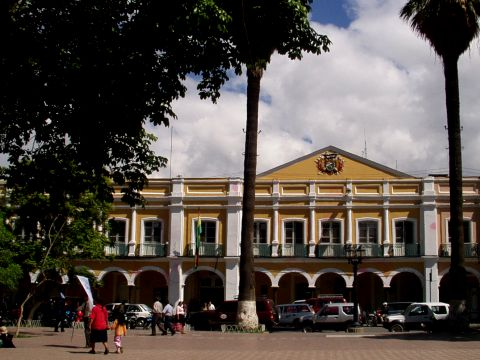

In [20]:
img = cv2.imread("1.jpg")
cv2_imshow(img)

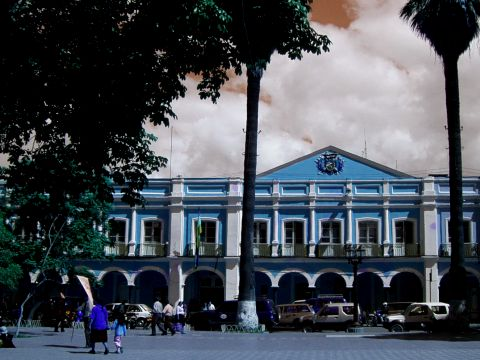

In [21]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img2)

In [22]:
img2.shape

(360, 480, 3)

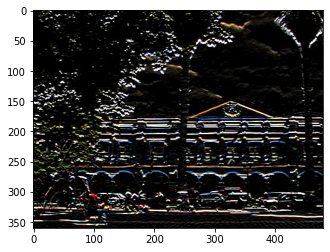

In [23]:
# Horizontal line detection:
res_h = cv2.filter2D(img2, -1, fil_h, borderType=cv2.BORDER_CONSTANT)    
plt.imshow(res_h)
pylab.show()

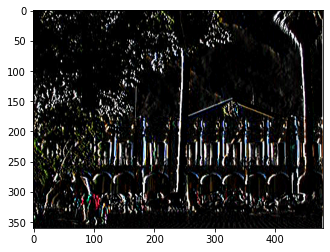

In [24]:
# Vertical line detection:
res_v = cv2.filter2D(img2, -1, fil_v, borderType=cv2.BORDER_CONSTANT)    
plt.imshow(res_v)
pylab.show()

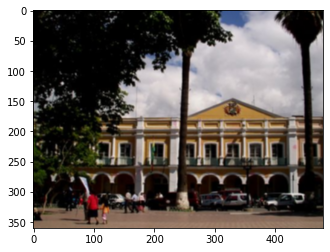

In [25]:
# Blur image
res_b = cv2.filter2D(img2, -1, fil_b)   
plt.imshow(res_b)
pylab.show()

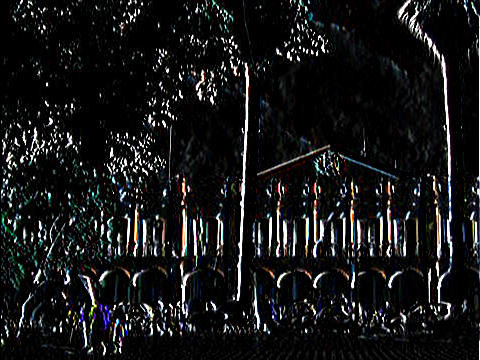

In [26]:
# Show sobel edge detection
res = np.zeros(img2.shape)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        for k in range(img2.shape[2]):
            res[i][j][k] =+ res_h[i][j][k]
            res[i][j][k] =+ res_v[i][j][k]
cv2_imshow(res)

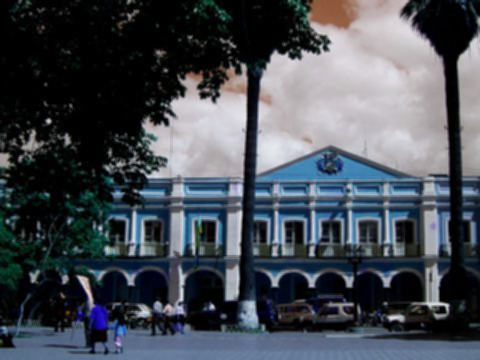

In [27]:
# Combine all 3 feature maps
res = np.zeros(img2.shape)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        for k in range(img2.shape[2]):
            res[i][j][k] =+ res_h[i][j][k]
            res[i][j][k] =+ res_v[i][j][k]
            res[i][j][k] =+ res_b[i][j][k]
cv2_imshow(res)

## Task 5. Refer to the multiple layers section in the tutorial material, repeatly apply the three kernels to the combined feature map that created by the previous round two times. Visualize the feature maps produced in the process

Horizontal Lines


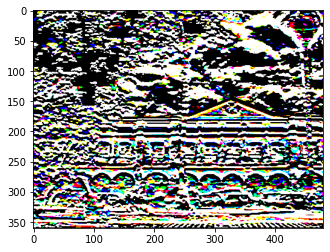

Vertical Lines


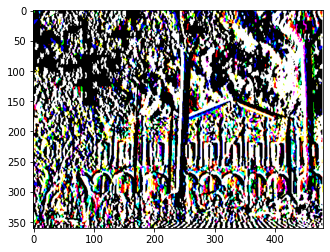

Blur


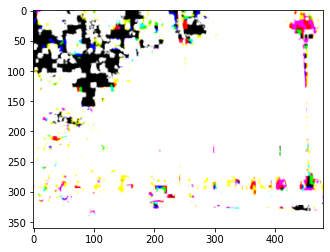

In [28]:
# Reapply filters once
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

res_h = cv2.filter2D(res, -1, fil_h, borderType=cv2.BORDER_CONSTANT)
print("Horizontal Lines")
plt.imshow(res_h)
pylab.show()

res_v = cv2.filter2D(res, -1, fil_v, borderType=cv2.BORDER_CONSTANT)
print("Vertical Lines")
plt.imshow(res_v)
pylab.show()

res_b = cv2.filter2D(res, -1, fil_b, borderType=cv2.BORDER_CONSTANT)
print("Blur")
plt.imshow(res_b)
pylab.show()

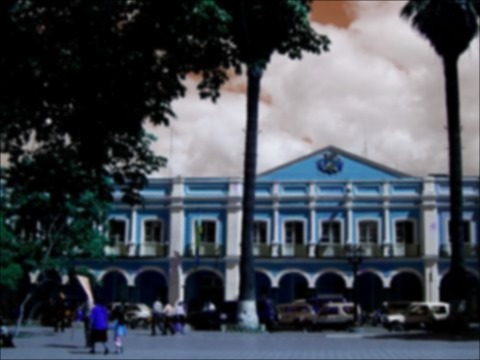

In [29]:
# Recombine filters
res = np.zeros(img2.shape)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        for k in range(img2.shape[2]):
            res[i][j][k] =+ res_h[i][j][k]
            res[i][j][k] =+ res_v[i][j][k]
            res[i][j][k] =+ res_b[i][j][k]
cv2_imshow(res)

Horizontal Lines


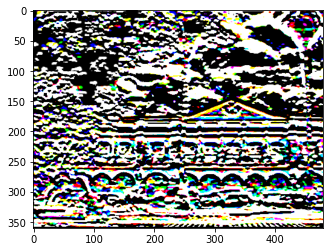

Vertical Lines


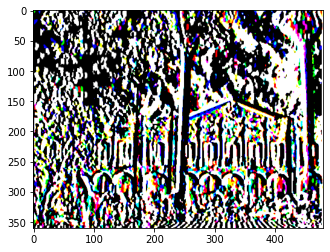

Blur


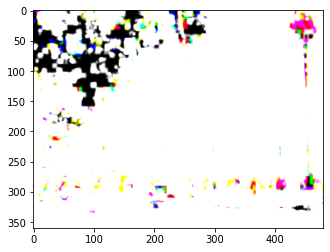

In [30]:
# Reapply filters a second time
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

res_h = cv2.filter2D(res, -1, fil_h, borderType=cv2.BORDER_CONSTANT)
print("Horizontal Lines")
plt.imshow(res_h)
pylab.show()

res_v = cv2.filter2D(res, -1, fil_v, borderType=cv2.BORDER_CONSTANT)
print("Vertical Lines")
plt.imshow(res_v)
pylab.show()

res_b = cv2.filter2D(res, -1, fil_b, borderType=cv2.BORDER_CONSTANT)
print("Blur")
plt.imshow(res_b)
pylab.show()

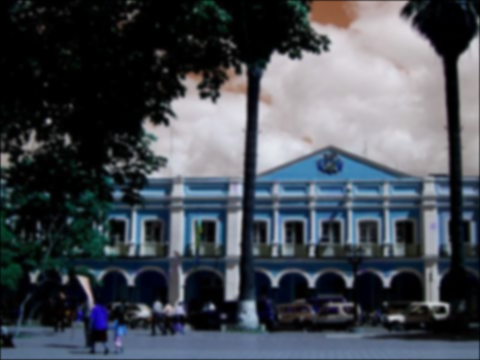

In [31]:
# Recombine filters
res = np.zeros(img2.shape)
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        for k in range(img2.shape[2]):
            res[i][j][k] =+ res_h[i][j][k]
            res[i][j][k] =+ res_v[i][j][k]
            res[i][j][k] =+ res_b[i][j][k]
cv2_imshow(res)